# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
# Done

training_file = "data/train.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
set(y_train)
X_test.shape

(12630, 32, 32, 3)

In [2]:
# Load all the packages 
import numpy as np
import csv
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import cv2
import random
from sklearn.utils import shuffle, resample

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
with open('signnames.csv', 'r') as csvfile:
    signnames = csv.DictReader(csvfile)
    SignNames = []
    for row in signnames:
        SignNames.append(row['SignName'])
        #print(row['ClassId']+' : ' + row['SignName'])
    #print(SignNames[0])
    

In [4]:
### Replace each question mark with the appropriate value.
# TODO: Number of training examples
# Done
n_train = X_train.shape[0]

# TODO: Number of testing examples.
# Done
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
# Done
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
# Done
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

for i in range(n_classes):
    print("Class {} ({}) has {} training samples and {} testing samples".
          format(i, SignNames[i], np.where(y_train==i)[0].shape[0], np.where(y_test==i)[0].shape[0]) )

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Class 0 (Speed limit (20km/h)) has 210 training samples and 60 testing samples
Class 1 (Speed limit (30km/h)) has 2220 training samples and 720 testing samples
Class 2 (Speed limit (50km/h)) has 2250 training samples and 750 testing samples
Class 3 (Speed limit (60km/h)) has 1410 training samples and 450 testing samples
Class 4 (Speed limit (70km/h)) has 1980 training samples and 660 testing samples
Class 5 (Speed limit (80km/h)) has 1860 training samples and 630 testing samples
Class 6 (End of speed limit (80km/h)) has 420 training samples and 150 testing samples
Class 7 (Speed limit (100km/h)) has 1440 training samples and 450 testing samples
Class 8 (Speed limit (120km/h)) has 1410 training samples and 450 testing samples
Class 9 (No passing) has 1470 training samples and 480 testing samples
Class 10 (No passing for vehicles over 3.5 metric tons) has 2010 trai

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
def show_example_sign(X, y, signClass):
    img = None
    index = np.where(y==signClass)[0][0]
    im = X[index,:,:,:]
    print(signClass)
    plt.figure(figsize=(1,1))
    img = plt.imshow(im)
    plt.draw()

0


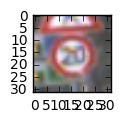

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline
show_example_sign(X_train, y_train, 0)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
def gaussian_filter(kernel_shape):
    x = np.zeros(kernel_shape, dtype=float)
    def gauss(x, y, sigma=2.0):
        Z = 2 * np.pi * sigma ** 2
        return  1. / Z * np.exp(-(x ** 2 + y ** 2) / (2. * sigma ** 2))
    mid = np.floor(kernel_shape[0] / 2.)
    for i in range(0, kernel_shape[0]):
        for j in range(0, kernel_shape[1]):
                x[i, j] = gauss(i - mid, j - mid)

    return x / np.sum(x)

# Local contrast normalization
def lecun_lcn(input, kernel_shape, threshold=1e-4):
    padSize = int(np.floor(kernel_shape / 2.))
    inputMin = np.min(input)
    padInput = cv2.copyMakeBorder(input, padSize, padSize, padSize, padSize, cv2.BORDER_CONSTANT,value = 0)
    convout =  cv2.GaussianBlur(padInput,(kernel_shape, kernel_shape),0)
    centered_X = input - convout[padSize:-padSize, padSize:-padSize]
    centered_Xmin = np.min(centered_X)
    sum_sq_XX = cv2.GaussianBlur(centered_X**2,(kernel_shape, kernel_shape),0)
    pad_sum_sq_XX = cv2.copyMakeBorder(sum_sq_XX, padSize, padSize, padSize, padSize, 
                                   cv2.BORDER_CONSTANT,value = 0)
    denorm = np.sqrt(pad_sum_sq_XX[padSize:-padSize, padSize:-padSize])
    #img_mean = np.mean(denorm)
    #divisor = np.maximum(denorm, img_mean)
    divisor = np.maximum(denorm, threshold)
    
    #img_mean = np.mean(denorm)
    #divisor = np.maximum(, threshold)
    return centered_X/divisor

# Global contrast normalization
def gcn(X):
    X = X.astype(float)
    mean = np.mean(X)
    X = X - mean
    normalizer = np.sqrt(np.sum(X**2.0))
    return X / np.maximum(normalizer, 1e-8)

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#for i in range(n_train):
X_train_copy = np.zeros_like(X_train,dtype=float)
for i in range(n_train):
    X_train_copy[i,:,:,:] = cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_RGB2YUV)
    Ychannel = X_train_copy[i,:,:,0]
    # Global contrast normalization
    Ymean = np.mean(Ychannel)
    Ychannel = Ychannel - Ymean
    # Local contrast normalization
    Ylcn = lecun_lcn(Ychannel,9)
    X_train_copy[i,:,:,0] = Ylcn
    #plt.imshow(Ylcn,cmap = 'Greys_r' )
X_test_copy = np.zeros_like(X_test,dtype=float)
for i in range(n_test):
    X_test_copy[i,:,:,:] = cv2.cvtColor(X_test[i,:,:,:], cv2.COLOR_RGB2YUV)
    Ychannel = X_test_copy[i,:,:,0]
    # Global contrast normalization
    Ymean = np.mean(Ychannel)
    Ychannel = Ychannel - Ymean
    # Local contrast normalization
    Ylcn = lecun_lcn(Ychannel,3)
    X_test_copy[i,:,:,0] = Ylcn


    
    

In [9]:
### Preprocess the data here.

# Convert the color image to gray image and apply the global constrast normalization
X_train_gray = np.zeros(X_train.shape[0:3], dtype=float)
X_test_gray = np.zeros(X_test.shape[0:3], dtype=float)
for i in range(n_train):
    img = cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_RGB2GRAY)
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    img = gcn(img)
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    img = lecun_lcn(img, 3)
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    X_train_gray[i,] = img
for i in range(n_test):
    img = gcn(cv2.cvtColor(X_test[i,:,:,:], cv2.COLOR_RGB2GRAY))
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    img = gcn(img)
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    img = lecun_lcn(img, 3)
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    X_test_gray[i,] = img
    
X_train_gray = X_train_gray.reshape((n_train,32,32,1))
X_test_gray = X_test_gray.reshape((n_test,32,32,1))
y_train_gray = y_train

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** As stated in the paper "Traffic Sign Recoginiton with Multi-Scale Convolutional Networks", ignoring the color information had achieved the best test accuracy. Thus, I preprocessed the data by converting the color images to be gray images. In addition, I did some experiments on running the NN on color images but the test accuracy is not improved.

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def shift_image(img, left_range, right_range):
    shift_left = random.randint(left_range[0], left_range[1])
    shift_right = random.randint(right_range[0], right_range[1])
    rows,cols = img.shape[0:2]
    M = np.float32([[1,0,shift_left],[0,1,shift_right]])
    for i in range(img.shape[2]):
        img[:,:,i] =  cv2.warpAffine(img[:,:,i],M,(cols,rows))
    return img

def scale_image(img, scale_range):
    scale = random.uniform(scale_range[0], scale_range[1])
    for i in range(img.shape[2]):
        orig = img[:,:,i]
        res = cv2.resize(orig,None,fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC)
        shift_x = int(abs(res.shape[0] - img.shape[0])/2)
        shift_y = int(abs(res.shape[1] - img.shape[1])/2)
        tmp = np.ones_like(orig, dtype = float) * np.min(orig)
        if scale > 1:      
            tmp = res[shift_x:(shift_x+img.shape[0]), shift_y:(shift_y+img.shape[1])]
        else:
            tmp[shift_x:(shift_x+res.shape[0]), shift_y:(shift_y+res.shape[1])] = res
        img[:,:,i] = tmp
    return img
            
def rotate_image(img, rotate_range):
    rotate_angle = random.randint(rotate_range[0], rotate_range[1])
    rows,cols = img.shape[0:2]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rotate_angle,1)
    return cv2.warpAffine(img,M,(cols,rows))




In [11]:
#X_train_jittered, y_train_jittered = shuffle(X_train_jittered, y_train_jittered)
#X_validation = X_train_jittered[0:8000,]
#y_validation = y_train_jittered[0:8000,]
#X_train = X_train_jittered[8000:-1,]
#y_train = y_train_jittered[8000:-1,]

X_train_copy = X_train_gray.copy()
y_train_copy = y_train_gray.copy()
X_train_copy, y_train_copy = shuffle(X_train_copy, y_train_copy)
X_validation = np.empty((0,32,32,1), dtype=float)
y_validation = np.empty((0), dtype=float)
X_train = np.empty((0,32,32,1), dtype=float)
y_train = np.empty((0), dtype=float)
for signClass in range(n_classes):
    ind = np.where(y_train_copy == signClass)[0]
    y_validation = np.append(y_validation, y_train_copy[ind[0:50],], axis =0)
    X_validation = np.append(X_validation, X_train_copy[ind[0:50],], axis =0)
    y_train = np.append(y_train, y_train_copy[ind[50:-1],], axis =0)
    X_train = np.append(X_train, X_train_copy[ind[50:-1],], axis =0)

 


In [18]:
numOfTimesForJitteredData = 1
y_train_jittered = y_train.copy()
for i in range(numOfTimesForJitteredData):
    y_train_jittered = np.concatenate((y_train_jittered, y_train))
print(y_train_jittered.shape)    
X_train_jittered = np.empty((0,32,32,1), dtype=float)
for i in range(X_train.shape[0]*numOfTimesForJitteredData):
    tmp = X_train.copy()[i%X_train.shape[0],:,:,:]
    tmp = shift_image(tmp,[-2,2],[-2,2])
    tmp = scale_image(tmp,[0.9, 1.1])
    tmp = rotate_image(tmp,[-15, 15])
    X_train_jittered = np.append(X_train_jittered, tmp.reshape(1,32,32,1), axis=0) 
    if i%1000 == 0:
        print(i)
X_train_jittered = np.concatenate((X_train_jittered, X_train))



(74032,)
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000


In [20]:
np.save("jitteredX", X_train_jittered)
np.save("jitteredy", y_train_jittered)

In [21]:
X_train_jittered = np.load("jitteredX.npy")
y_train_jittered = np.load("jitteredy.npy")

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I keep the original testing data as test data. For each class of sign, I sampled 50 images from the training data to form the validation data and use the rest of them as the new training data.

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x, n_classes, channel):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x108.
    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, channel, 108], mean = mu, stddev = sigma))
    b_conv1 = tf.Variable(tf.zeros(108))
    conv1 = tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 32x32x108. Output = 16x16x108.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # TODO: Layer 2: Convolutional. Output = 16x16x108.
    W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 108, 108], mean = mu, stddev = sigma))
    b_conv2 = tf.Variable(tf.zeros(108))
    conv2 = tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 16x16x108. Output = 8x8x108.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 8x8x108. Output = 6912.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 6912. Output = 2000.
    fc1_W = tf.Variable(tf.truncated_normal([6912, 2000], mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(2000))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # TODO: Layer 4: Fully Connected. Input = 2000. Output = 500.
    fc2_W = tf.Variable(tf.truncated_normal([2000, 500], mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(500))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 500. Output = n_classses.
    fc3_W = tf.Variable(tf.truncated_normal([500, n_classes], mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [13]:

def VGG16(x, n_classes, channel):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Conv Layer 1_1: Convolutional. Input = 32x32xchannel. Output = 32x32x64.
    kernel1_1 = tf.Variable(tf.truncated_normal([3, 3, channel, 64], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(x, kernel1_1, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[64], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv1_1 = tf.nn.relu(out)
    
    # Conv Layer 1_2: Convolutional. Input = 32x32x64. Output = 32x32x64.
    kernel1_2 = tf.Variable(tf.truncated_normal([3, 3, 64, 64], dtype=tf.float32,
                                             stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv1_1, kernel1_2, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[64], dtype=tf.float32),
                                 trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv1_2 = tf.nn.relu(out)
    
    # pooling
    pool1 = tf.nn.max_pool(conv1_2,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME',
                        name='pool1')
    
    # Conv Layer 2_1: Convolutional. Input = 16x16x64. Output = 16x16x128.
    kernel2_1 = tf.Variable(tf.truncated_normal([3, 3, 64, 128], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(pool1, kernel2_1, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[128], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv2_1 = tf.nn.relu(out)
    
    # Conv Layer 2_2: Convolutional. Input = 16x16x128. Output = 16x16x128.
    kernel2_2 = tf.Variable(tf.truncated_normal([3, 3, 128, 128], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv2_1, kernel2_2, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[128], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv2_2 = tf.nn.relu(out,)
    
    # pooling
    pool2 = tf.nn.max_pool(conv2_2,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME',
                        name='pool2')
    
     # Conv Layer 3_1: Convolutional. Input = 8x8x128. Output = 8x8x256.
    kernel3_1 = tf.Variable(tf.truncated_normal([3, 3, 128, 256], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(pool2, kernel3_1, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv3_1 = tf.nn.relu(out)
    
    # Conv Layer 3_2: Convolutional. Input = 8x8x256. Output = 8x8x256.
    kernel3_2 = tf.Variable(tf.truncated_normal([3, 3, 256, 256], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv3_1, kernel3_2, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv3_2 = tf.nn.relu(out)
    
    # Conv Layer 3_3: Convolutional. Input = 8x8x256. Output = 8x8x256.
    kernel3_3 = tf.Variable(tf.truncated_normal([3, 3, 256, 256], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv3_2, kernel3_3, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv3_3 = tf.nn.relu(out)
    
    # pooling
    pool3 = tf.nn.max_pool(conv3_3,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME',
                        name='pool3')
    
    
    # Conv Layer 4_1: Convolutional. Input = 4x4x256. Output = 4x4x512.
    kernel4_1 = tf.Variable(tf.truncated_normal([3, 3, 256, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(pool3, kernel4_1, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv4_1 = tf.nn.relu(out)
    
    # Conv Layer 4_2: Convolutional. Input = 4x4x512. Output = 4x4x512.
    kernel4_2 = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv4_1, kernel4_2, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv4_2 = tf.nn.relu(out)
    
    # Conv Layer 4_3: Convolutional. Input = 4x4x512. Output = 4x4x512.
    kernel4_3 = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv4_2, kernel4_3, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                         trainable=True, name='biases')
    out = tf.nn.bias_add(conv, biases)
    conv4_3 = tf.nn.relu(out)
    
    # pooling
    pool4 = tf.nn.max_pool(conv4_3,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME',
                        name='pool4')
    
 
    
    # Flatten. Input = 4x4x512. Output = 8192.
    fc0 = flatten(pool4)
    shape = int(np.prod(pool4.get_shape()[1:]))
    
     # Fully Connected 1. Input = 8192. Output = 4096.
    
    fc1w = tf.Variable(tf.truncated_normal([shape, 4096],
                                           dtype=tf.float32,
                                           stddev=1e-1), name='weights')
    fc1b = tf.Variable(tf.constant(1.0, shape=[4096], dtype=tf.float32),
                                 trainable=True, name='biases')
    fc1l = tf.nn.bias_add(tf.matmul(fc0, fc1w), fc1b)
    fc1 = tf.nn.relu(fc1l)
    
    # Fully Connected 2. Input = 4096. Output = 4096.
    fc2w = tf.Variable(tf.truncated_normal([4096, 4096],
                                           dtype=tf.float32,
                                           stddev=1e-1), name='weights')
    fc2b = tf.Variable(tf.constant(1.0, shape=[4096], dtype=tf.float32),
                                 trainable=True, name='biases')
    fc2l = tf.nn.bias_add(tf.matmul(fc1, fc2w), fc2b)
    fc2 = tf.nn.relu(fc2l)
    
    # Fully Connected 2. Input = 4096. Output = n_classes.
    fc3w = tf.Variable(tf.truncated_normal([4096, n_classes],
                                           dtype=tf.float32,
                                           stddev=1e-1), name='weights')
    fc3b = tf.Variable(tf.constant(1.0, shape=[n_classes], dtype=tf.float32),
                                 trainable=True, name='biases')
    logits = tf.nn.bias_add(tf.matmul(fc2, fc3w), fc3b)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [14]:
import tensorflow as tf
channel = 1



In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, channel))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [16]:
logits = LeNet(x, n_classes, channel)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
best_EPOCHS = 0
best_accuracy = 0
best_BATCH_SIZE = 0
best_rate = 0;
X_train = X_train_jittered
y_train = y_train_jittered
num_examples = len(X_train) 
for rate in [0.0001]: #[0.0005, 0.001, 0.002]:
    for BATCH_SIZE in [256]: #[128, 256, 512]:
        for EPOCHS in [100]: #[10, 50, 100]:
            optimizer = tf.train.AdamOptimizer(learning_rate = rate)
            training_operation = optimizer.minimize(loss_operation)
            print(rate,BATCH_SIZE,EPOCHS)
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                print("Training...")
                print()
                for i in range(EPOCHS):
                    #X_train, y_train = shuffle(X_train_jittered.copy()[-int(num_examples/2)-1:-1], y_train_jittered.copy()[-int(num_examples/2)-1:-1])
                    X_train, y_train = shuffle(X_train, y_train)
                   # print(X_train.shape)
                   # print(X_train_jittered.shape)
                    for offset in range(0, num_examples, BATCH_SIZE):
                        end = offset + BATCH_SIZE
                        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
                    validation_accuracy = evaluate(X_validation, y_validation)
                    print("EPOCH {} ...".format(i+1))
                    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                    print()
                if (validation_accuracy > best_accuracy) :   
                    saver.save(sess, 'lenet_original_0005')
                    best_EPOCHS = EPOCHS
                    best_accuracy = validation_accuracy
                    best_BATCHSIZE = BATCH_SIZE
                    best_rate = rate
                    print("Model saved")

0.0001 256 100
Training...

EPOCH 1 ...
Validation Accuracy = 0.751

EPOCH 2 ...
Validation Accuracy = 0.931

EPOCH 3 ...
Validation Accuracy = 0.970

EPOCH 4 ...
Validation Accuracy = 0.988



In [18]:
print(rate,BATCH_SIZE,EPOCHS)

0.001 256 100


In [23]:
X_test = X_test_gray
#print("Best EPOCHS: {} Best BATCHSIZE: {} Best rate: {} Best Validation Accuracy {}:".format(best_EPOCHS, best_BATCHSIZE, 
#                                                                                       best_rate, best_accuracy))
BATCH_SIZE = 256
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet_original_0005.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.894


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** YUV channels Epoch 100 test accuracy 86.1%
            RGB channels Epoch 100 test accuracy 90.8%
            Only Gray Epoch 100 test accuracy 93.8%
            Only Gray Epoch 100 after Global and local contrast normalization 94.6%
            
            jittered data test accuracy 96.4%
            Best EPOCHS: 100 Best BATCHSIZE: 256 Best rate: 0.001 Best Validation Accuracy 0.9925581395348837
            
            original data test accuracy 88.4%
            Best EPOCHS: 100 Best BATCHSIZE: 256 Best rate: 0.001 Best Validation Accuracy 0.96
            

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

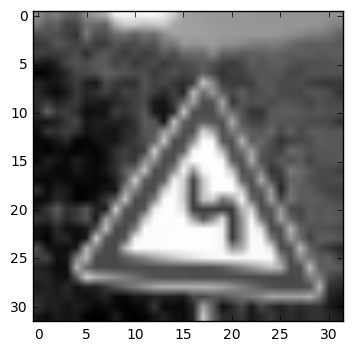

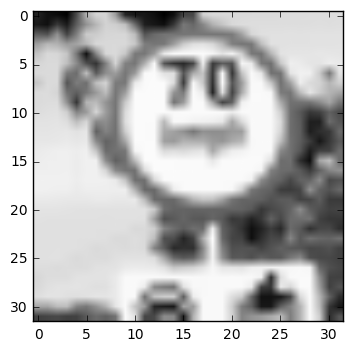

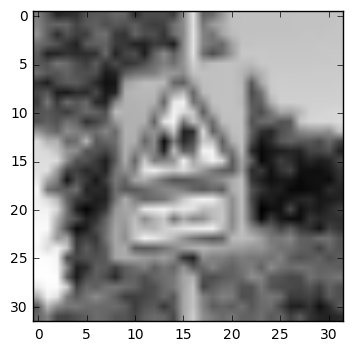

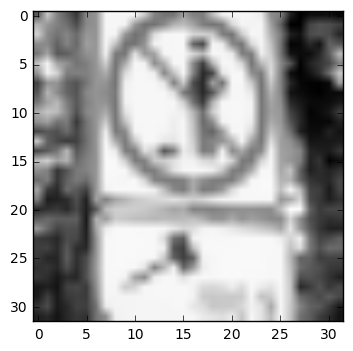

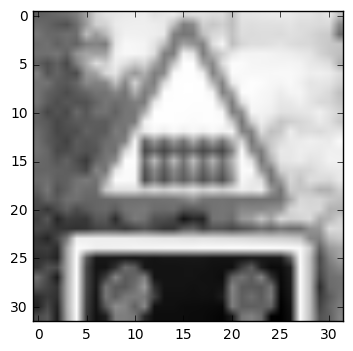

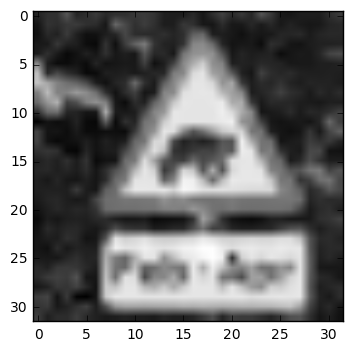

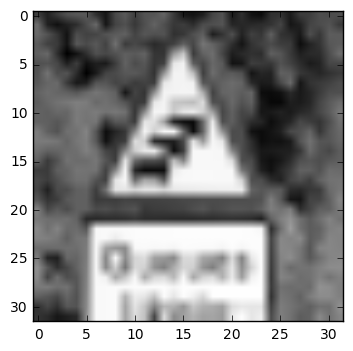

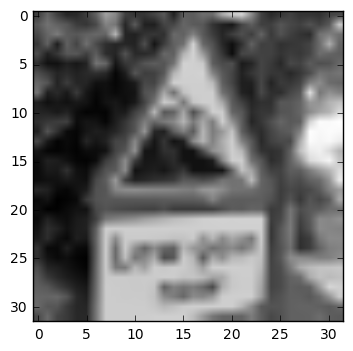

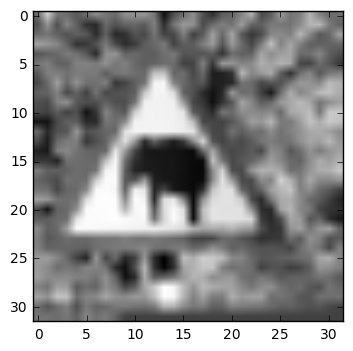

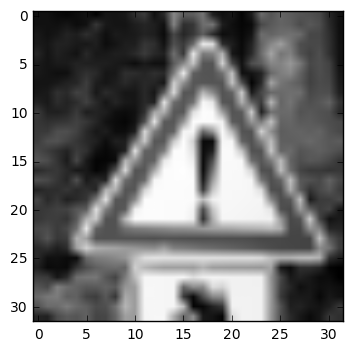

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
n_real = 10
for i in range(n_real):
    image = cv2.resize(cv2.imread('data/trafficSign/' + str(i+1) +'.png', 0), (32,32), interpolation = cv2.INTER_AREA)
   # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap="Greys_r")
    plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

(10, 32, 32, 1)
21
The 0 image Prediction = Double curve
13
The 1 image Prediction = Yield
24
The 2 image Prediction = Road narrows on the right
30
The 3 image Prediction = Beware of ice/snow
11
The 4 image Prediction = Right-of-way at the next intersection
11
The 5 image Prediction = Right-of-way at the next intersection
11
The 6 image Prediction = Right-of-way at the next intersection
23
The 7 image Prediction = Slippery road
26
The 8 image Prediction = Traffic signals
18
The 9 image Prediction = General caution


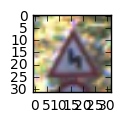

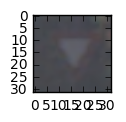

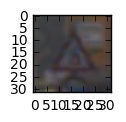

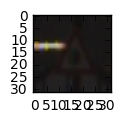

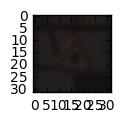

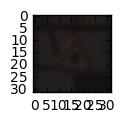

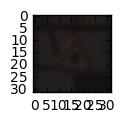

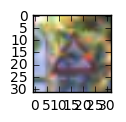

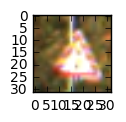

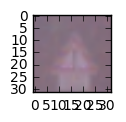

In [30]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
X_real = np.empty((0,32,32,1), dtype=float)
for i in range(n_real):
    image = cv2.resize(cv2.imread('data/trafficSign/' + str(i+1) +'.png', 0), (32,32), interpolation = cv2.INTER_AREA)
    X_real = np.append(X_real, image.reshape((1,32,32,1)), axis =0)
print(X_real.shape)
X_gray_real = np.zeros(X_real.shape[0:3], dtype=float)
for i in range(n_real):
    img = gcn(X_real[i,:,:,0])
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    img = gcn(img)
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    img = lecun_lcn(img, 3)
    #plt.figure()
    #plt.imshow(img,cmap = 'Greys_r' )
    X_gray_real[i,] = img
X_gray_real = X_gray_real.reshape((n_real,32,32,1))

prediction = tf.argmax(logits, 1)
print(signnames)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predicts = sess.run(prediction, feed_dict={x: X_gray_real})
    


21
The 0 image Prediction = Double curve
13
The 1 image Prediction = Yield
24
The 2 image Prediction = Road narrows on the right
30
The 3 image Prediction = Beware of ice/snow
11
The 4 image Prediction = Right-of-way at the next intersection
11
The 5 image Prediction = Right-of-way at the next intersection
11
The 6 image Prediction = Right-of-way at the next intersection
23
The 7 image Prediction = Slippery road
26
The 8 image Prediction = Traffic signals
18
The 9 image Prediction = General caution


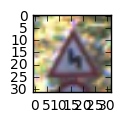

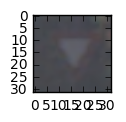

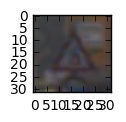

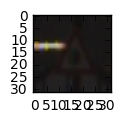

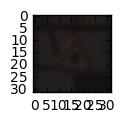

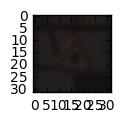

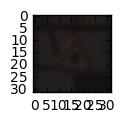

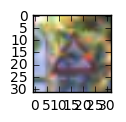

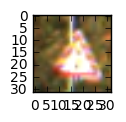

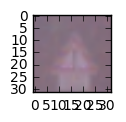

In [31]:
%matplotlib inline
for i in range(n_real):
    signClass = predicts[i]
    plt.figure()
    show_example_sign(X_train, y_train, signClass)
    print("The {} image Prediction = {}".format(i,SignNames[signClass]))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [44]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.